In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('./'))))

from payoff import *

# PUT Option 구매자 만기일 손익

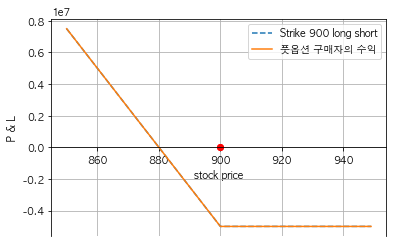

In [10]:
st = np.arange(850, 950, 1)
total_payoff = np.zeros(st.shape)
fig, ax = plt.subplots()

strike = 900
premium = 20

payoff = long_put_payoff(st, strike, premium, contracts=1, multiplier=250000)
plot_spread(st, payoff, strike1, fig, ax, 'Strike {} long short'.format(strike1),'dashed')
total_payoff += payoff

plot_spread(st, total_payoff, strike, fig, ax, "풋옵션 구매자의 수익",'solid')

# Put option 판매자의 보상 (seller payoff)

To get the payoff graph for option seller, we have multiplied the payoff of option buyer by -1.0, as the option buyer makes profit, the option seller will lose the exact same amount and vice-versa.

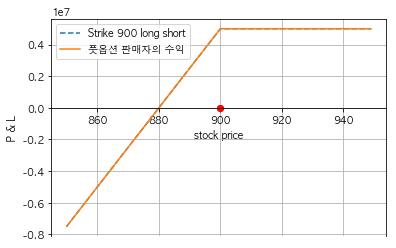

In [11]:
st = np.arange(850, 950, 1)
total_payoff = np.zeros(st.shape)
fig, ax = plt.subplots()

strike = 900
premium = 20

payoff = short_put_payoff(st, strike, premium, contracts=1, multiplier=250000)
plot_spread(st, payoff, strike1, fig, ax, 'Strike {} long short'.format(strike1),'dashed')
total_payoff += payoff

plot_spread(st, total_payoff, strike, fig, ax, "풋옵션 판매자의 수익",'solid')

# put-call parity

Put-Call parity 는 동일한 기초자산, 동일 만기, 동일 행사가의 유럽형 풋옵션과 콜옵션의 관계를 정의한 것이다. 풋옵션 매도와 콜옵션 매수를 동시에 하면 그 기초자산(주식) 의 선물을 보유한 것과 같은 수익을 얻는다 (동일 만기, 행사가와 동일한 선물가격)

만약, 이 관계가 성립 않으면 차익거래 기회가 생긴다. 이러한 risk-free profit 기회는 드물고 금방 사라진다.

**call option 매수 + put option 매도**

    행사가 500, 만기 1 년, 프리미엄 100 인 call option 매수

    행사가 500, 만기 1 년, 프리미엄 100 인 put option 매도
    
* 유럽형 옵션에만 해당. 미국형은 만기까지 보유할 때 해당

In [12]:
strike_price = 500    # 행사가
premium = 100        # 프리미엄
sT = np.arange(100,800)   # 가격 범위

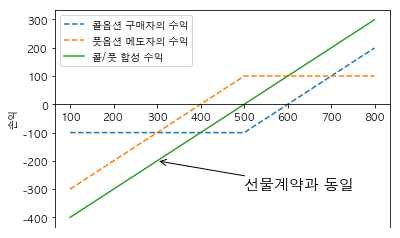

In [17]:
call_long_profit = long_call_payoff(sT, strike_price, premium)
put_short_profit = short_put_payoff(sT, strike_price, premium)
total_profit = call_long_profit + put_short_profit
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
plt.plot(sT, call_long_profit, '--', label='콜옵션 구매자의 수익')
plt.plot(sT, put_short_profit, '--', label='풋옵션 메도자의 수익')
plt.plot(sT, total_profit, label='콜/풋 합성 수익')
plt.annotate("선물계약과 동일", xy=(300,-200), xytext=(500,-300), fontsize=15,
             arrowprops={'arrowstyle': '->'})

plt.legend()
plt.ylabel('손익');

# Arbitrage 거래

1) portfolio A :

call option 매수 + zero coupon bond 매수

    행사가 500, 만기 1 년, call option 매수

    만기 1 년, 500(행사가와 동일 금액 수령) 채권 매수
    
2) portfolio B :

put option 매수 + underlying asset
    
    행사가 500, 만기 1 년, put option 매수

    underlying asset 500 매수
    
    
* 채권 중에는 제로쿠폰(zero coupon, zero coupon bond)이란 것이 있다. 즉, 이자가 전혀 없다는 것으로 무이자 채권이다. 제로쿠폰은 이자가 없지만 대신 발행할 때 미리 그 이자에 상당하는 금액을 할인해 준다. 5년 만기 20% 할인율의 100만원 짜리 제로쿠폰이 있다고 하면, 이것을 살 때는 80만원만 지급하면 되고 5년이 지난 뒤에 이 채권을 제시하면 100만원을 받게 된다.

In [18]:
strike_price = 500 
premium = 0
sT = np.arange(0,1000) 

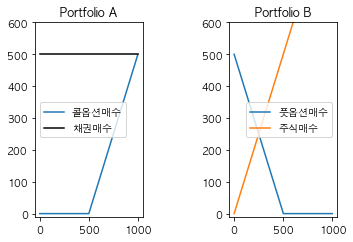

In [20]:
call_long_profit = long_call_payoff(sT, strike_price, premium)
put_long_profit = long_put_payoff(sT, strike_price, premium)
bond = 500
plt.subplot(121)
plt.plot(sT, call_long_profit, label='콜옵션매수')
plt.plot([0, 1000],[500, 500],'k-', label='채권매수')
plt.title('Portfolio A')
plt.legend(loc='center left')
plt.ylim(-10, 600)

plt.subplot(122)
plt.plot(sT, put_long_profit, label='풋옵션매수')
plt.plot(sT, sT, label='주식매수');
plt.title('Portfolio B');
plt.legend(loc='center right')
plt.ylim(-10, 600)

plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)

| 행사가 | 만기주가 | Porfolio A | Portfolio B        
| :- |-------------: | :-: |
|500| 600 | 100+500 = 600 | 0 + 600
|500| 400 | 0 + 500 | 100 + 400 = 500

Portfolio A = $C + X\exp^{-rt}$

Portfolio B = P + $S_0$

C = Call price

P = Put price

X = 행사가

$S_0$ = initial price of underlying

r = interest rate

t = time to expiry

$e^{-rt}$ : 할인율